In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_events = pd.read_csv('../talkingdata_DATA/app_events.csv')

In [3]:
brand_df = pd.read_csv('../talkingdata_DATA/phone_brand_device_model.csv')

In [4]:
label_categories = pd.read_csv('../talkingdata_DATA/label_categories.csv')
app_labels = pd.read_csv('../talkingdata_DATA/app_labels.csv')
events = pd.read_csv('../talkingdata_DATA/events.csv')

In [5]:
gender_age_train = pd.read_csv('../talkingdata_DATA/gender_age_train.csv')
gender_age_test = pd.read_csv('../talkingdata_DATA/gender_age_test.csv')

In [6]:
display(gender_age_train.head()) # want to predict group, involves multiclass classification

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


### Clean app_events and events dataframes: 

In [8]:
display(app_events.head()) # event_id corresponds to that in events dataframe
display(events.head())

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [7]:
# convert timestamp column to pd.datetime
events['timestamp'] = events['timestamp'].map(pd.to_datetime)

### Clean phone brand dataframe (brand_df)

In [8]:
# dictionary of brand categories and their associated numbers/indices
brand_categories = brand_df[['phone_brand']].drop_duplicates().reset_index(drop=True).reset_index()
brand_categories = brand_categories.rename(columns = {'index': 'phone_brand_id'})

In [9]:
# dictionary of device models and their associated indices
device_categories = brand_df[['device_model']].drop_duplicates().reset_index(drop=True).reset_index()
device_categories = device_categories.rename(columns = {'index': 'device_model_id'})

In [10]:
brand_categories.head()

,phone_brand_id,phone_brand
0,0,小米
1,1,三星
2,2,SUGAR
3,3,华为
4,4,vivo


In [51]:
device_categories.head()

,device_model_id,device_model
0,0,红米
1,1,MI 2
2,2,Galaxy S4
3,3,时尚手机
4,4,Galaxy Note 2


In [11]:
# want a number for each phone-brand, not chinese name
brand_df = brand_df.merge(brand_categories, on='phone_brand')

In [12]:
brand_df = brand_df.merge(device_categories, on='device_model')

In [13]:
brand_df.drop(['device_model','phone_brand'], inplace=True, axis=1)

In [14]:
brand_df = brand_df.sort_values('device_id')

In [15]:
phone_brand_counts = brand_df.phone_brand_id.value_counts(normalize=True).rename_axis(
    'phone_brand_id').reset_index(name='proportion').merge(brand_categories,
                                                       on='phone_brand_id')
phone_brand_counts.head(10) # top 10 phone brands

,phone_brand_id,proportion,phone_brand
0,0,0.230767,小米
1,1,0.183108,三星
2,3,0.173911,华为
3,4,0.076878,vivo
4,8,0.076312,OPPO
5,5,0.063302,魅族
6,6,0.044898,酷派
7,11,0.036108,联想
8,10,0.014783,金立
9,15,0.014323,HTC


### Label Categories

In [116]:
display(label_categories.head())
display(app_labels.head())
display(app_events.head())
# can see that label_categories classifies the apps into categories
# app_labels just associates each app with their label
# app_events actually gives the app used with each event_id

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [16]:
# look at number of app types and most common
print(label_categories.shape) # 930 types of apps
print(app_labels.shape) # 459,943 app downloads
common_categories = app_labels.label_id.value_counts().rename_axis(
    'label_id').reset_index(name='counts').merge(label_categories,
                                                       on='label_id')
common_categories.head(10)

(930, 2)
(459943, 2)


,label_id,counts,category
0,548,56902,Industry tag
1,405,53936,Custom label
2,794,49320,Tencent
3,795,48707,game
4,704,45697,Property Industry 2.0
5,714,19083,1 free
6,713,11840,Services 1
7,854,9955,Property Industry new
8,710,9027,Relatives 1
9,711,8831,Irritation / Fun 1


In [17]:
# determine important label_categories
app_category_ls = list(label_categories.category)
# possibly subcategorize into games, comic, shopping, education, banking/finance, travel

In [105]:
#app_category_ls

In [51]:
# from gensim.models import Word2Vec
# sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
#             ['this', 'is',  'another', 'book'],
#             ['one', 'more', 'book'],
#             ['this', 'is', 'the', 'new', 'post'],
#                         ['this', 'is', 'about', 'machine', 'learning', 'post'],  
#             ['and', 'this', 'is', 'the', 'last', 'post']]
# model = Word2Vec(sentences, min_count=1)

In [104]:
app_category_ls

930

In [41]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_md')

In [100]:
ls = app_category_ls[70:80]
#similarity_array = np.array([nlp(word1).similarity(nlp(word2)) for word1 in ls for word2 in ls]).reshape(20,20)

In [101]:
similarity_array = np.array([[nlp(word1).similarity(nlp(word2)) for word1 in ls] for word2 in ls])

In [195]:
# get all unique values in list of app labels: 
category_ls = list(set(app_category_ls))

# remove nan value and convert to df:
category_df = pd.DataFrame([word for word in category_ls if type(word) == str], columns =['labels'])

# remove all labels that have to do with games: 
category_ls = list(category_df[~category_df['labels'].str.contains("game|poker|Game|majiang", na=False)].labels)
category_ls.append('game') # convert back to list and append string with game to encompass all games

In [271]:
ls = category_ls
#similarity_array = np.array([[nlp(word1).similarity(nlp(word2)) for word1 in ls] for word2 in ls])
# if nlp(word1).has_vector and nlp(word2).has_vector

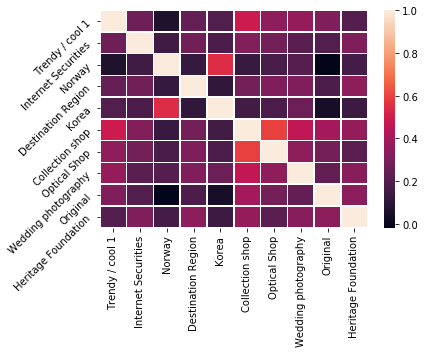

In [201]:
ax = sns.heatmap(similarity_array, linewidth=0.5)
ax.set_xticklabels(ls, rotation=90)
ax.set_yticklabels(ls, rotation=45)
plt.show()

In [203]:
import sklearn.cluster
import distance

In [249]:
ls = category_ls[0:40]

In [210]:
similarity_array = np.array([[nlp(word1).similarity(nlp(word2)) for word1 in ls] for word2 in ls])

In [253]:
word = ls[0]
token = nlp(word)

In [260]:
# for word in ls:
#     token = nlp(word)
#     if token.is_oov:
#         print(token.text, token.has_vector)
        
    # for token in tokens: 
#     # Printing the following attributes of each token. 
#     # text: the word string, has_vector: if it contains 
#     # a vector representation in the model,  
#     # vector_norm: the algebraic norm of the vector, 
#     # is_oov: if the word is out of vocabulary. 
#     print(token.text, token.has_vector, token.vector_norm, token.is_oov) 
    

In [211]:
affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.5)

In [212]:
affprop.fit(similarity_array)

AffinityPropagation(affinity='precomputed', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [213]:
ls = np.asarray(ls)

In [214]:
for cluster_id in np.unique(affprop.labels_):
    exemplar = ls[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(ls[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))

 - *Collection shop:* Bathroom products, Collection shop, Leather Care, Musical instruments, Optical Shop, Photographic prints, Trendy / cool 1, Wedding photography
 - *Western Dinner:* Japan and South Korea (Air), Water Coffee Bar, Western Dinner, Western Mythology, movie, takeaway ordering
 - *2G:* 2G, 4.5-3.1 inches, N shares
 - *Low risk:* High profitability, Low risk, lose weight
 - *Property Industry new:* Brand Country, Corporate, Destination Region, Heritage Foundation, Internet Securities, Original, Property Industry new, Three Generations of children, Youth House, financial, ski facility, tourism product
 - *BM:* BM
 - *airport:* Hotel Type, Taxi, airport
 - *Finland:* Belgium, Finland, Korea, Norway


In [219]:
print("Enter two space-separated words") 
words = input() 
  
tokens = nlp(words) 

Enter two space-separated words
hello hi


In [226]:
nlp('hellohi')

hellohi

In [116]:
# tokens = nlp(words) 

# for token in tokens: 
#     # Printing the following attributes of each token. 
#     # text: the word string, has_vector: if it contains 
#     # a vector representation in the model,  
#     # vector_norm: the algebraic norm of the vector, 
#     # is_oov: if the word is out of vocabulary. 
#     print(token.text, token.has_vector, token.vector_norm, token.is_oov) 
  
# token1, token2 = tokens[0], tokens[1] 
  
# print("Similarity:", token1.similarity(token2)) 

In [108]:
game_categories = label_categories[label_categories['category'].str.contains("game|poker", na=False)]

In [115]:
label_categories.shape

(930, 2)

### Examine one device_id

In [ ]:
# note that many device_ids are associated with no events at all (probably remove from training)

In [162]:
device_id = gender_age_train.device_id[15]

In [167]:
events[events.device_id == device_id].head()

,event_id,device_id,timestamp,longitude,latitude
12800,12801,1508636020748379883,2016-05-01 13:12:07,120.26,31.91
45606,45607,1508636020748379883,2016-05-04 13:08:44,120.26,31.90
202641,202642,1508636020748379883,2016-05-04 13:05:26,120.26,31.90
412111,412112,1508636020748379883,2016-05-01 13:06:16,120.26,31.91
526711,526712,1508636020748379883,2016-05-01 21:39:58,120.25,31.89


In [203]:
# feature ideas: 
# mean amount travelled (based on lat/long)
# average hour of the day using apps
# extreme hours of the night using apps
# with or without events
# most common app-type for device
# most used app for device
# how many apps used on device
# how many events recorded
# active apps vs installed apps
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [196]:
game_categories = label_categories[label_categories['category'].str.contains("game", na=False)]

In [210]:
# for each device, want number of apps installed and number of game apps installed

app_events

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1
...,...,...,...,...
32473062,3252948,6607018907660377991,1,1
32473063,3252948,6602285879264922467,1,1
32473064,3252948,4348659952760821294,1,1
32473065,3252948,-995726944612374565,1,1


In [215]:
app_categories = app_labels.merge(label_categories, on='label_id').drop('label_id', axis=1)

In [222]:
app_events.drop('is_installed', inplace=True, axis=1) # is installed is 1 for every app id

In [225]:
device_event_dict = events[['event_id','device_id']]

In [226]:
device_event_dict.merge(app_events, on='event_id')

,event_id,device_id
0,1,29182687948017175
1,2,-6401643145415154744
2,3,-4833982096941402721
3,4,-6815121365017318426
4,5,-5373797595892518570
...,...,...
3252945,3252946,-8995272658520685777
3252946,3252947,6790350461641275817
3252947,3252948,7111660304904287709
3252948,3252949,2786044170600788970


In [266]:
event_counts = app_events.groupby('event_id').agg({'app_id': 'count', 'is_active': 'sum'}).rename(
    columns = {'app_id': 'total_apps', 'is_active': 'active_apps'}).reset_index(col_level=1) 
# col-level lets you take both columns produced by groupby
event_counts

,event_id,total_apps,active_apps
0,2,19,6
1,6,38,15
2,7,40,13
3,9,35,7
4,16,31,1
...,...,...,...
1488091,3252935,14,14
1488092,3252936,3,3
1488093,3252937,19,19
1488094,3252946,69,25


In [267]:
event_counts = event_counts.merge(events[['event_id','device_id']], on='event_id')

In [275]:
device_id = gender_age_train.device_id[18]
event_counts[event_counts.device_id == device_id]
# three events just means three times they were using the talkingdata SDK, for example, may have added or deleted
# apps, for now just use the average number of total and active apps and total proportion

,event_id,total_apps,active_apps,device_id
288955,632373,51,17,-6876541075223249434
376077,822284,50,14,-6876541075223249434
453408,991969,53,14,-6876541075223249434
521108,1139762,48,12,-6876541075223249434
643143,1406391,48,9,-6876541075223249434
1049662,2293847,53,17,-6876541075223249434


In [277]:
event_counts['proportion_active'] = event_counts.apply(lambda x: x['active_apps']/x['total_apps'], axis=1)

In [282]:
app_features = event_counts.groupby('device_id')[['total_apps','active_apps','proportion_active']].mean()

In [285]:
app_features = app_features.merge(gender_age_train, on='device_id', how='inner')

## Visualise distributions

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [296]:
app_features

,device_id,total_apps,active_apps,proportion_active,gender,age,group
0,-9222956879900151005,45.575758,21.515152,0.637809,M,36,M32-38
1,-9221026417907250887,17.047619,8.190476,0.678901,F,31,F29-32
2,-9220830859283101130,9.750000,3.875000,0.495265,M,19,M22-
3,-9220061629197656378,54.147059,1.882353,0.367542,M,40,M39+
4,-9218960997324667698,22.500000,9.333333,0.419017,F,53,F43+
...,...,...,...,...,...,...,...
23285,9216925254504446539,41.120690,27.913793,0.811190,M,41,M39+
23286,9217638755105369544,47.000000,9.000000,0.191489,F,49,F43+
23287,9219164468944552013,22.476861,19.400402,0.948750,M,35,M32-38
23288,9219842210460037807,11.357143,7.178571,0.787909,F,29,F29-32


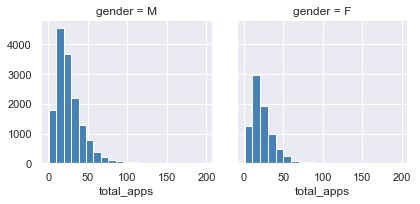

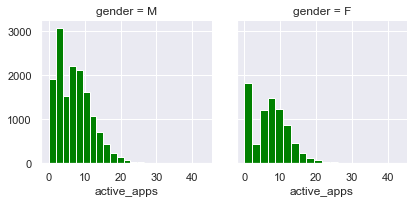

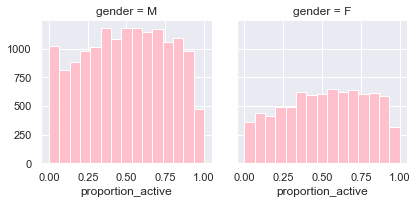

In [304]:
g = sns.FacetGrid(app_features, col='gender', margin_titles=True)
#bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_apps", color="steelblue", bins=20)
plt.show()
g = sns.FacetGrid(app_features, col='gender', margin_titles=True)
g.map(plt.hist, "active_apps", color="green", bins=20)
plt.show()
g = sns.FacetGrid(app_features, col='gender', margin_titles=True)
g.map(plt.hist, "proportion_active", color="pink", bins=15)
plt.show()

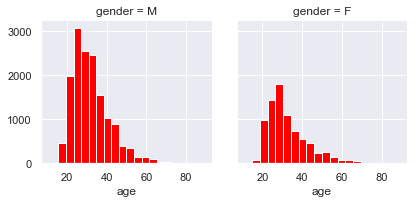

In [306]:
g = sns.FacetGrid(app_features, col='gender', margin_titles=True)
g.map(plt.hist, "age", color="red", bins=20)
plt.show()